Dataset
DATA :
https://drive.google.com/drive/folders/1PIHOikInKitUTOTVVwUlGNkJf2-TaA1t?usp=share_link

Label :
https://drive.google.com/file/d/1TiYNL_kt43sy0E-L2X-eaQRHNIw1yDMb/view?usp=share_link

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
imageDimensions = (32,32)
testRatio = 0.2   #if  1000 images split 200 for testing 
validationRation = 0.2 #if 1000 images 20% of  800 will be 160 for validation

In [ ]:
img_path = '/content/gdrive/MyDrive/Traffic Sign Dataset DORA/myData_rev 2'
data_list = []
labels_list = []
classes_list = 30
for i in range(classes_list):
    i_path = os.path.join(img_path, str(i)) #0-29
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img).convert('RGB')
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)

data = np.array(data_list)
labels = np.array(labels_list)

#17m

In [ ]:
print(labels)

[ 0  0  0 ... 29 29 29]


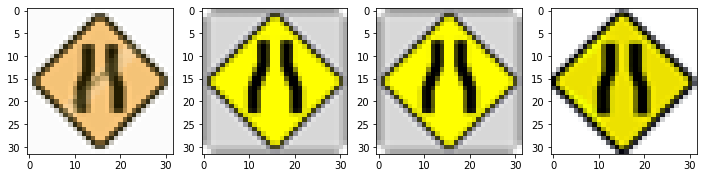

In [ ]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [ ]:
print(data.shape)
print(data[0])
print(data.dtype)

(1500, 32, 32, 3)
[[[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 ...

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]]
uint8


In [ ]:
def prep_dataset(X):
  X_prep = X.astype('float32')
  return (X_prep)

X = prep_dataset(data)
y = labels

In [ ]:
print(y)

[ 0  0  0 ... 29 29 29]


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=testRatio, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=validationRation, shuffle=True)

In [ ]:
print("Data Shapes")
print("Train", end="");print(X_train.shape,Y_train.shape)
print("Validation",end="");print(X_val.shape,Y_val.shape)
print("Test",end=""); print(X_test.shape , Y_test.shape)

assert(X_train.shape[0] == Y_train.shape[0]),"The number of images in not equal to the number of labels in training set"
assert(X_val.shape[0] == Y_val.shape[0]),"The number of images in not equal to the number of labels validation set"
assert(X_test.shape[0] == Y_test.shape[0]),"The number of images in not equal to the number of labels test set"
# assert(X_train.shape[1:]== (imageDimensions)), "The dimension of the Training images are wrong"
# assert(X_val.shape[1:]==(imageDimensions)),"The dimension of the Validation images are wrong"
# assert(X_test.shape[1:]== imageDimensions),"The dimension of test images aste wrong"

Data Shapes
Train(1200, 32, 32, 3) (1200,)
Validation(240, 32, 32, 3) (240,)
Test(60, 32, 32, 3) (60,)


In [ ]:
label = pd.read_csv('/content/gdrive/MyDrive/Traffic Sign Dataset DORA/labels (1).csv', encoding="ISO-8859-1")
print("Label Shape: ",label.shape, type(label))

Label Shape:  (30, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
label

,Classid,Nama
0,0,Peringatan Penyempitan Badan Jalan di Bagian K...
1,1,Peringatan Penyempitan Badan Jalan di Bagian Kiri
2,2,Peringatan Penyempitan Bagan Jalan Tertentu
3,3,Peringatan Permukaan Jalan yang Licin
4,4,Peringatan Banyak Lalu Lintas Pejalan Kaki
5,5,Peringatan Banyak Lalu Lintas Pejalan Kaki Ana...
6,6,Larangan Berjalan Terus karena Wajib Berhenti ...
7,7,Larangan Masuk bagi Sepeda Motor
8,8,Batas Kecepatan 40 Km/Jam
9,9,Perintah Belok ke Arah Kiri


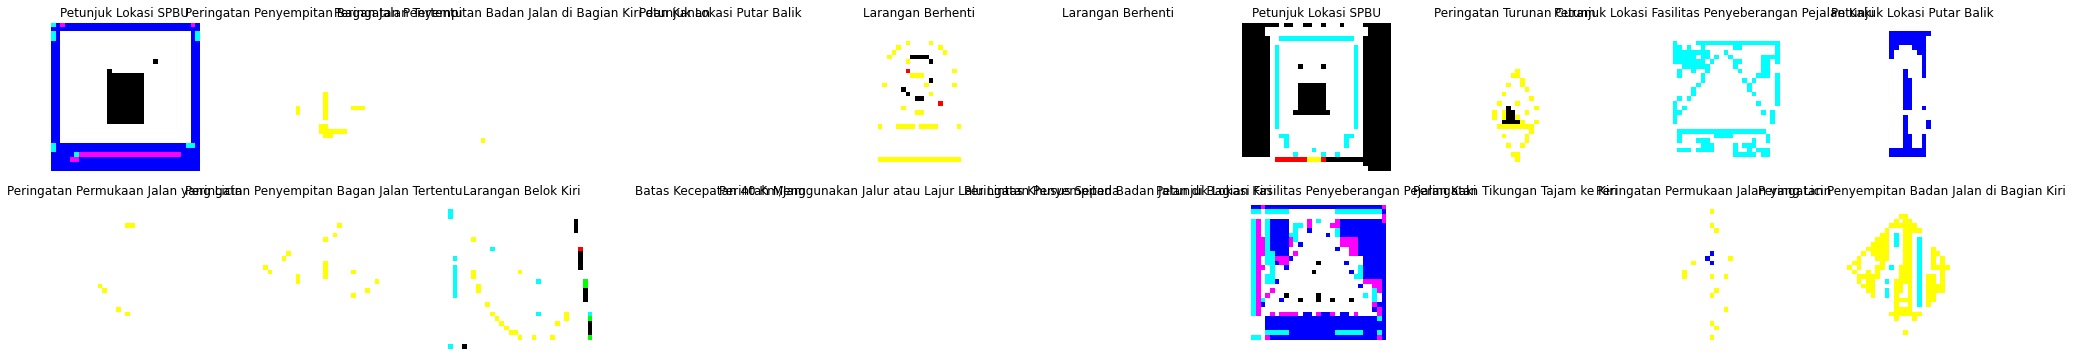

In [ ]:
plt.figure(figsize=(35,6))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i])
    plt.title("{}".format(label.Nama[Y_train[i]]))    
    plt.axis("off")

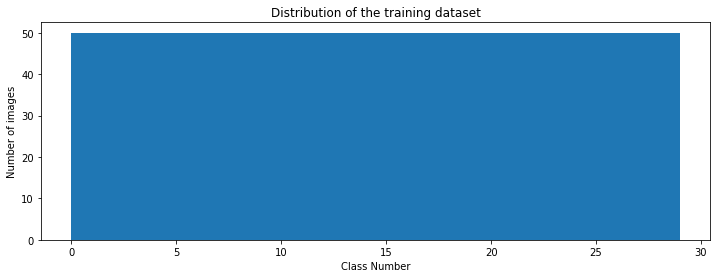

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(labels, bins=len(label.Classid))
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.astype(np.uint8)
X_val = X_val.astype(np.uint8)
X_test = X_test.astype(np.uint8)

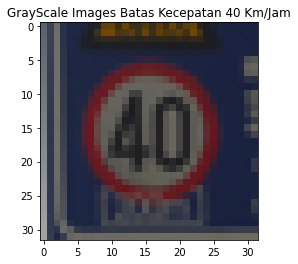

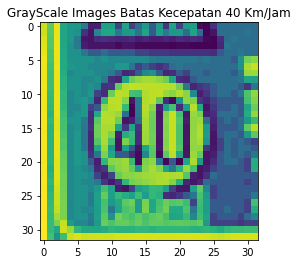

In [ ]:
import random
import cv2

def equalize(img):
    # grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayimg = cv2.equalizeHist(grayimg)
    return grayimg 

rand_num = random.randint(0,len(X_train)-1)
plt.imshow(X_train[rand_num])
plt.title("GrayScale Images {}".format(label.Nama[Y_train[rand_num]]))
plt.show()

 
X_train = np.array(list(map(equalize, X_train)))
X_validation = np.array(list(map(equalize, X_val)))
X_test = np.array(list(map(equalize, X_test)))
plt.imshow(X_train[rand_num])
plt.title("GrayScale Images {}".format(label.Nama[Y_train[rand_num]]))
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],X_val.shape[2],3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2],1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataGen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, Y_train, batch_size=20)
X_batch, y_batch = next(batches)

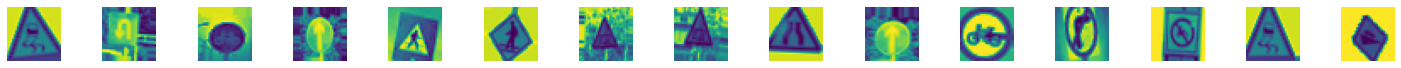

In [ ]:
fig, axs = plt.subplots(1,15, figsize= (20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')
plt.show()

In [ ]:
print("Data Shapes")
print("Train", end="");print(X_train.shape,Y_train.shape)
print("Validation",end="");print(X_val.shape,Y_val.shape)
print("Test",end=""); print(X_test.shape , Y_test.shape)

Data Shapes
Train(1200, 32, 32, 1) (1200,)
Validation(240, 32, 32, 3) (240,)
Test(60, 32, 32, 1) (60,)


In [ ]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=4,activation='relu',padding='same',input_shape=(32,32,1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=4,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=4,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=4,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
#hyperparameter tuning
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history= model.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/15
19/19 [==============================] - 62s 3s/step - loss: 4.4001 - accuracy: 0.1275 - val_loss: 71.6375 - val_accuracy: 0.0167
Epoch 2/15
19/19 [==============================] - 56s 3s/step - loss: 2.3110 - accuracy: 0.3400 - val_loss: 51.1212 - val_accuracy: 0.0167
Epoch 3/15
19/19 [==============================] - 57s 3s/step - loss: 1.4260 - accuracy: 0.5675 - val_loss: 19.0446 - val_accuracy: 0.0167
Epoch 4/15
19/19 [==============================] - 57s 3s/step - loss: 0.8566 - accuracy: 0.7308 - val_loss: 7.0277 - val_accuracy: 0.0167
Epoch 5/15
19/19 [==============================] - 56s 3s/step - loss: 0.5899 - accuracy: 0.8183 - val_loss: 3.9524 - val_accuracy: 0.1500
Epoch 6/15
19/19 [==============================] - 55s 3s/step - loss: 0.3789 - accuracy: 0.8750 - val_loss: 2.6042 - val_accuracy: 0.2833
Epoch 7/15
19/19 [==============================] - 54s 3s/step - loss: 0.2871 - accuracy: 0.9167 - val_loss: 1.3560 - val_accuracy: 0.5833
Epoch 8/15
19/19 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<function matplotlib.pyplot.show(*args, **kw)>

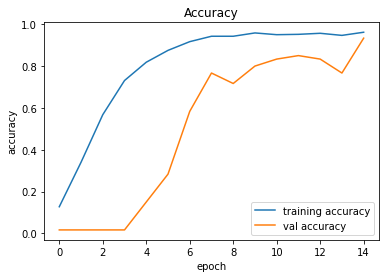

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show

#3plt.plot(history.history['loss'])
#plt.legend(['training'])
#plt.title('loss')
#plt.xlabel('epoch')
#plt.figure(2)
#plt.plot(history.history['accuracy'])
#plt.legend(['training'])
#plt.title('Acurracy')
#plt.xlabel('epoch')
#plt.show()
#score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test Score:', score[0])
#print('Test Accuracy:', score[1])

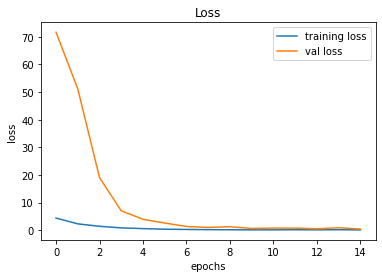

In [ ]:
#Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

2/2 [==============================] - 1s 298ms/step


In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

2/2 [==============================] - 1s 336ms/step


In [ ]:
#Eror
Y_pred = model.predict_classes(X_test)
Y_pred

AttributeError: ignored

In [ ]:
#Eror
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

In [ ]:
#Save Model
model.save("MY_h5_model_5.h5")

In [ ]:
#Upload Image

import tensorflow as tf
import tensorflow.keras.utils
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images by upload
  path = fn
  img = keras.utils.load_img(path, target_size = (32, 32))
  img = tf.image.rgb_to_grayscale(img)
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(X_train)

  for j in range(20):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break


In [ ]:
label = pd.read_csv('/content/gdrive/MyDrive/Traffic Sign Dataset DORA/labels (1).csv',encoding="ISO-8859-1")
frameWidth = 640 
frameHeight = 480 
brightness = 180 
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
# Setup the video camera 
import keras.models 

cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,frameHeight)
cap.set(10, brightness)

# import the trannined model 
model = keras.models.load_model("MY_h5_model_5.h5")

In [ ]:
#Camera testing
def equalize(img):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayimg =cv2.equalizeHist(grayimg)
    return grayimg 

def preprocessing(img):
    img = equalize(img)
    return img

def getCalssName(classNo):
    labelss=pd.read_csv("/content/gdrive/MyDrive/Traffic Sign Dataset DORA/labels.csv",encoding='ISO-8859-1')
    a=labelss[labelss["Classid"]==data]["Name"]
    return a


while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
 
    # PROCESS IMAGE
    img = np.asarray(imgOrignal) 
    # img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    
    # PREDICT IMAGE
    predictions = model.predict(img)
    probabilityValue =np.amax(predictions)
    classIndex = np.where(predictions == probabilityValue)[1][0]
    
    if probabilityValue > threshold:
        #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break